# Crime and Housing

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from scipy import stats

In [2]:
# load data sets
crime = pd.read_csv('crime-housing-austin-2015.csv')
population = pd.read_csv('AustinZipCodes.csv')

# clean columns and set to float data types
population['Population'] = population['Population'].str.replace(",", "").astype('float')
population['People / Sq. Mile'] = population['People / Sq. Mile'].str.replace(",", "").astype('float')

# remove rows where no Zip Code is given and convert to integers
crime = crime.dropna(subset='Zip_Code_Crime')
crime['Zip_Code_Crime'] = crime['Zip_Code_Crime'].astype(np.int64)

# count the number of crimes per zip code
crime_counts = crime.groupby('Zip_Code_Crime').agg({'Key':'count', 
                                                     'Medianhouseholdincome':'first', 
                                                     'Medianrent':'first', 
                                                     'Medianhomevalue':'first'}).rename(columns={'Key':'Count'})

# merge crime and population with demographics
crime_rate = pd.merge(crime_counts, population, left_on="Zip_Code_Crime", right_on='Zip Code', how='inner')
crime_rate['Crime_Rate'] = crime_rate.Count / crime_rate.Population * 100000
crime_rate['Medianhomevalue'] = crime_rate['Medianhomevalue'].str.replace("$", "").astype('float')
crime_rate['Medianrent'] = crime_rate['Medianrent'].str.replace("$", "").astype('float')
crime_rate['Medianhouseholdincome'] = crime_rate['Medianhouseholdincome'].str.replace("$", "").astype('float')
crime_rate.head(10)

,Count,Medianhouseholdincome,Medianrent,Medianhomevalue,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank,Crime_Rate
0,2103,68152.0,1590.0,338300.0,22,78701,"30.271653, -97.741553","Austin, Texas",3855.0,2326.65,"#3,995",54552.529183
1,1668,34734.0,766.0,175400.0,8,78702,"30.263909, -97.714495","Austin, Texas",22534.0,4501.98,"#2,015",7402.147865
2,738,92606.0,1183.0,621900.0,13,78703,"30.294204, -97.765114","Austin, Texas",19585.0,3491.54,"#2,753",3768.189941
3,2571,50248.0,940.0,338200.0,6,78704,"30.243128, -97.765874","Austin, Texas",43249.0,5001.96,"#1,713",5944.646119
4,1346,11917.0,1088.0,292500.0,1,78705,"30.293474, -97.738268","Austin, Texas",26825.0,11008.66,#519,5017.707363
5,237,93305.0,1018.0,243200.0,27,78717,"30.488309, -97.764829","Austin, Texas",8148.0,1081.05,"#6,119",2908.689249
6,186,NaN,NaN,NaN,43,78719,"30.184794, -97.682619","Austin, Texas",1765.0,93.88,"#14,377",10538.243626
7,482,32131.0,870.0,121000.0,19,78721,"30.269811, -97.683126","Austin, Texas",10124.0,2568.43,"#3,690",4760.964046
8,332,44917.0,930.0,265100.0,20,78722,"30.293272, -97.709068","Austin, Texas",6365.0,2567.53,"#3,692",5216.025137
9,2124,41869.0,817.0,176500.0,5,78723,"30.305341, -97.683344","Austin, Texas",30110.0,5175.95,"#1,640",7054.134839


# Overall Crime Rate Correlated with Financial Health

In [9]:
# drop NaN value in financial health metrics
crime_rate_dropna = crime_rate.dropna(subset='Medianhouseholdincome')
crime_rate_dropna = crime_rate_dropna.dropna(subset='Medianrent')
crime_rate_dropna = crime_rate_dropna.dropna(subset='Medianhomevalue')
crime_rate_dropna.head()

,Count,Medianhouseholdincome,Medianrent,Medianhomevalue,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank,Crime_Rate
0,2103,68152.0,1590.0,338300.0,22,78701,"30.271653, -97.741553","Austin, Texas",3855.0,2326.65,"#3,995",54552.529183
1,1668,34734.0,766.0,175400.0,8,78702,"30.263909, -97.714495","Austin, Texas",22534.0,4501.98,"#2,015",7402.147865
2,738,92606.0,1183.0,621900.0,13,78703,"30.294204, -97.765114","Austin, Texas",19585.0,3491.54,"#2,753",3768.189941
3,2571,50248.0,940.0,338200.0,6,78704,"30.243128, -97.765874","Austin, Texas",43249.0,5001.96,"#1,713",5944.646119
4,1346,11917.0,1088.0,292500.0,1,78705,"30.293474, -97.738268","Austin, Texas",26825.0,11008.66,#519,5017.707363


In [4]:
# these are the ZIP codes that were dropped
crime_rate[crime_rate.isnull().any(axis=1)]

,Count,Medianhouseholdincome,Medianrent,Medianhomevalue,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank,Crime_Rate
6,186,NaN,NaN,NaN,43,78719,"30.184794, -97.682619","Austin, Texas",1765.0,93.88,"#14,377",10538.243626
11,45,NaN,NaN,NaN,42,78725,"30.228676, -97.594967","Austin, Texas",1836.0,116.87,"#13,282",2450.980392
19,1,NaN,NaN,NaN,32,78733,"30.323857, -97.894860","Austin, Texas",8716.0,510.92,"#8,116",11.473153
21,71,NaN,NaN,NaN,40,78736,"30.250877, -97.968810","Austin, Texas",6897.0,187.88,"#11,301",1029.433087
22,4,NaN,NaN,NaN,41,78737,"30.177041, -97.956661","Austin, Texas",7100.0,143.90,"#12,372",56.338028
29,275,NaN,NaN,NaN,39,78747,"30.122470, -97.746210","Austin, Texas",5079.0,194.02,"#11,173",5414.451664


### Crimes vs. Median Household Income

PearsonRResult(statistic=-0.4425458034155756, pvalue=0.007765843211134035)

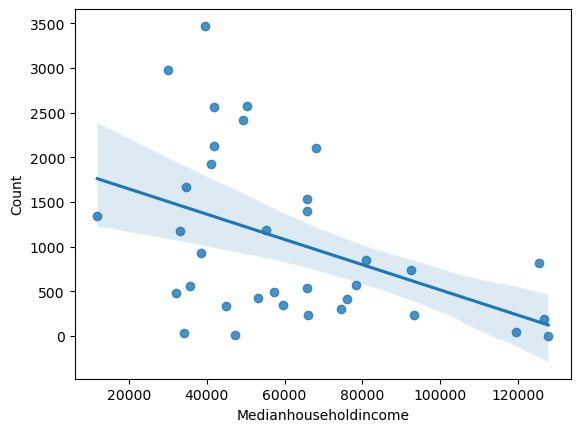

In [5]:
sns.regplot(data=crime_rate_dropna, x='Medianhouseholdincome', y='Count')
stats.pearsonr(crime_rate_dropna.Medianhouseholdincome, crime_rate_dropna.Count)

### Crimes vs. Median Rent

PearsonRResult(statistic=-0.24317543187954999, pvalue=0.15924068221020973)

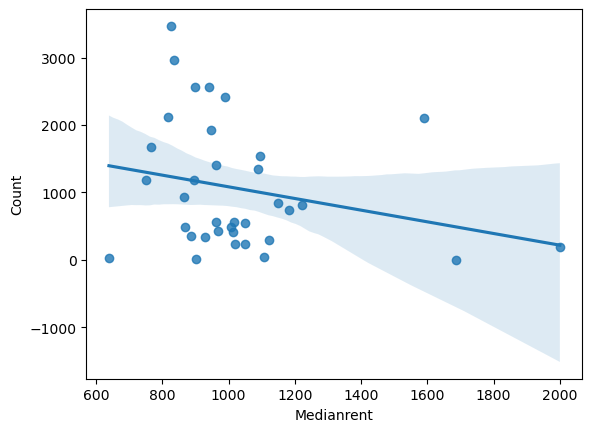

In [10]:
sns.regplot(data=crime_rate_dropna, x='Medianrent', y='Count')
stats.pearsonr(crime_rate_dropna.Medianrent, crime_rate_dropna.Count)

### Crimes vs. Median Home Value

PearsonRResult(statistic=-0.3160880879915886, pvalue=0.06433717775149315)

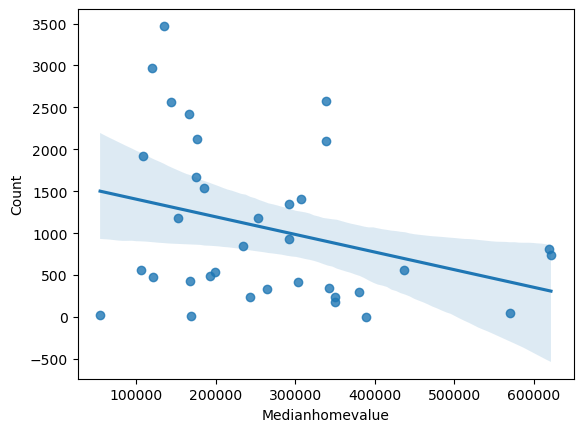

In [11]:
sns.regplot(data=crime_rate_dropna, x='Medianhomevalue', y='Count')
stats.pearsonr(crime_rate_dropna.Medianhomevalue, crime_rate_dropna.Count)

# T-Test Comparisons of Low vs High Income Zip Codes